## Spotify Songs EDA  

## Problem Statement:  
In the age of digital music streaming, platforms like Spotify have revolutionized the way we listen to 
music. Analyzing streaming data can reveal valuable insights into listening habits, genre popularity, 
song  features,  and  trends  that  define  the  music  industry. In this project, we will explore Spotify’s 
track  data  to  identify  patterns,  relationships  between  audio  features  and  popularity,  and  the 
characteristics of top-charting songs

Dataset Link:  
https://www.kaggle.com/datasets/iamsumat/spotify-top-200-charts-2020 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## EDA Questions:

1 How many unique artists are in the dataset?

2 What is the distribution of song popularity scores?

3 Which artists appear most frequently in the Top 200?

4 What are the most common genres?

5 What is the average duration of songs?

6 How do audio features like danceability, energy, and valence vary across genres?

7 Which countries contribute the most to the top charts?


In [8]:
df = pd.read_csv('spotify_dataset.csv')
df.head()


,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [9]:
df.shape

(1556, 23)

In [6]:
# How many unique artists are in the dataset?

unique_artists = df['Artist'].nunique()
unique_artists


716

In [10]:
# What is the distribution of song popularity scores?

popularity_distribution = df['Popularity'].describe()
popularity_distribution


count     1556
unique      70
top         75
freq        67
Name: Popularity, dtype: object

In [11]:
# 3 Which artists appear most frequently in the Top 200?
top_artists = df['Artist'].value_counts().head(10)
top_artists

Artist
Taylor Swift     52
Justin Bieber    32
Lil Uzi Vert     32
Juice WRLD       30
Pop Smoke        29
BTS              29
Bad Bunny        28
Eminem           22
The Weeknd       21
Ariana Grande    20
Name: count, dtype: int64

In [12]:
# 4 What are the most common genres?

common_genres = df['Genre'].value_counts().head(10)
common_genres


Genre
[]                                                75
['dance pop', 'pop', 'post-teen pop']             71
['latin', 'reggaeton', 'trap latino']             63
['pop', 'post-teen pop']                          57
['melodic rap', 'philly rap', 'rap', 'trap']      33
['chicago rap', 'melodic rap']                    32
['canadian pop', 'pop', 'post-teen pop']          32
['brooklyn drill']                                30
['k-pop', 'k-pop boy group']                      30
['latin', 'reggaeton', 'reggaeton colombiano']    29
Name: count, dtype: int64

In [20]:
# 5 What is the average duration of songs?
# Robustly convert 'Duration (ms)' to numeric (remove any non-digit characters) and handle errors
df['Duration'] = pd.to_numeric(
	df['Duration (ms)'].astype(str).str.replace(r'[^\d.]', '', regex=True),
	errors='coerce'
)

# Remove any rows where Duration conversion failed (NaN values)
valid_durations = df['Duration'].dropna()

# compute average in milliseconds and seconds
if len(valid_durations) > 0:
	average_duration_ms = valid_durations.mean()
	average_duration_s = average_duration_ms / 1000
	print(f"Average duration: {average_duration_ms:.2f} ms ({average_duration_s:.2f} seconds)")
	print(f"Number of valid duration entries: {len(valid_durations)} out of {len(df)}")
else:
	average_duration_ms = np.nan
	average_duration_s = np.nan
	print("No valid duration data found")

# show results
average_duration_ms, average_duration_s


Average duration: 197940.82 ms (197.94 seconds)
Number of valid duration entries: 1545 out of 1556


(np.float64(197940.81682847897), np.float64(197.94081682847897))

In [21]:
# 6 How do audio features like danceability, energy, and valence vary across genres?

# First, convert audio features to numeric values
audio_features = ['Danceability', 'Energy', 'Valence']

for feature in audio_features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

# Group by genre and calculate mean values for audio features
genre_audio_features = df.groupby('Genre')[audio_features].mean().round(3)

# Display the results
print("Audio features by genre (top 10 most common genres):")
print(genre_audio_features.head(10))

# Calculate overall statistics
print("\nOverall statistics for audio features:")
print(df[audio_features].describe())


Audio features by genre (top 10 most common genres):
                                                    Danceability  Energy  \
Genre                                                                      
                                                             NaN     NaN   
['a cappella']                                             0.364   0.378   
['acoustic pop', 'neo mellow', 'pop', 'pop rock']          0.686   0.457   
['adult standards', 'american folk revival']               0.683   0.375   
['adult standards', 'brill building pop', 'easy...         0.240   0.598   
['adult standards', 'brill building pop', 'easy...         0.589   0.472   
['adult standards', 'brill building pop', 'easy...         0.724   0.276   
['adult standards', 'canadian pop', 'jazz pop',...         0.527   0.356   
['adult standards', 'easy listening', 'lounge',...         0.442   0.202   
['adult standards', 'easy listening', 'lounge',...         0.500   0.284   

                                  

## Visualization Questions:

1 Bar chart of Top 10 artists by number of chart appearances.

2 Histogram of song popularity scores.

3 Boxplot showing distribution of danceability across genres.

4 Heatmap showing correlation between audio features (danceability, energy, valence, tempo, loudness).

5 Line chart showing trend of popularity over time.

6 Scatter plot of energy vs loudness colored by genre.

7 Pie chart showing percentage distribution of songs by explicit vs non-explicit lyrics.

<Axes: xlabel='Artist'>

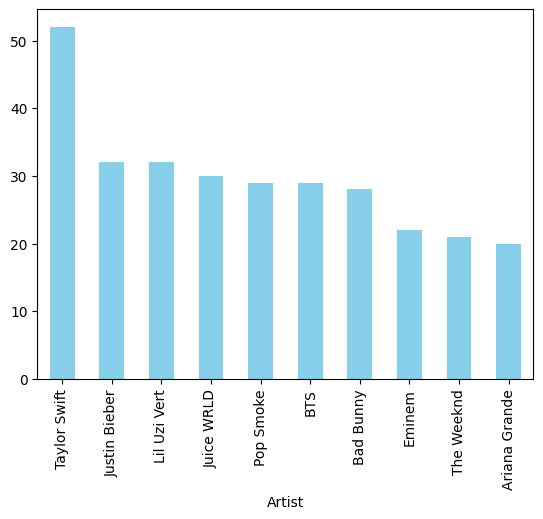

In [22]:
# 1 Bar chart of Top 10 artists by number of chart appearances.
top_artists.plot(kind='bar', color='skyblue')


<Axes: ylabel='Frequency'>

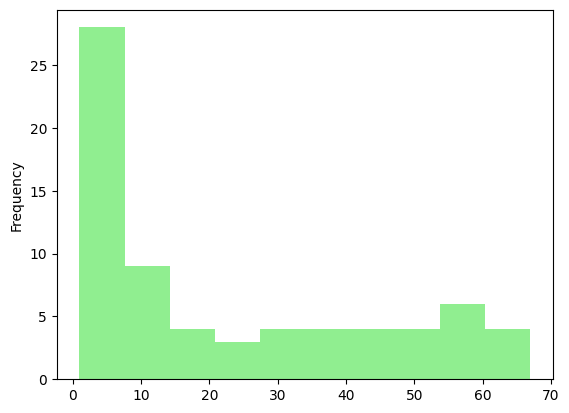

In [24]:
# 2 Histogram of song popularity scores.
popularity_distribution = df['Popularity'].value_counts().sort_index()
popularity_distribution.plot(kind='hist', color='lightgreen')

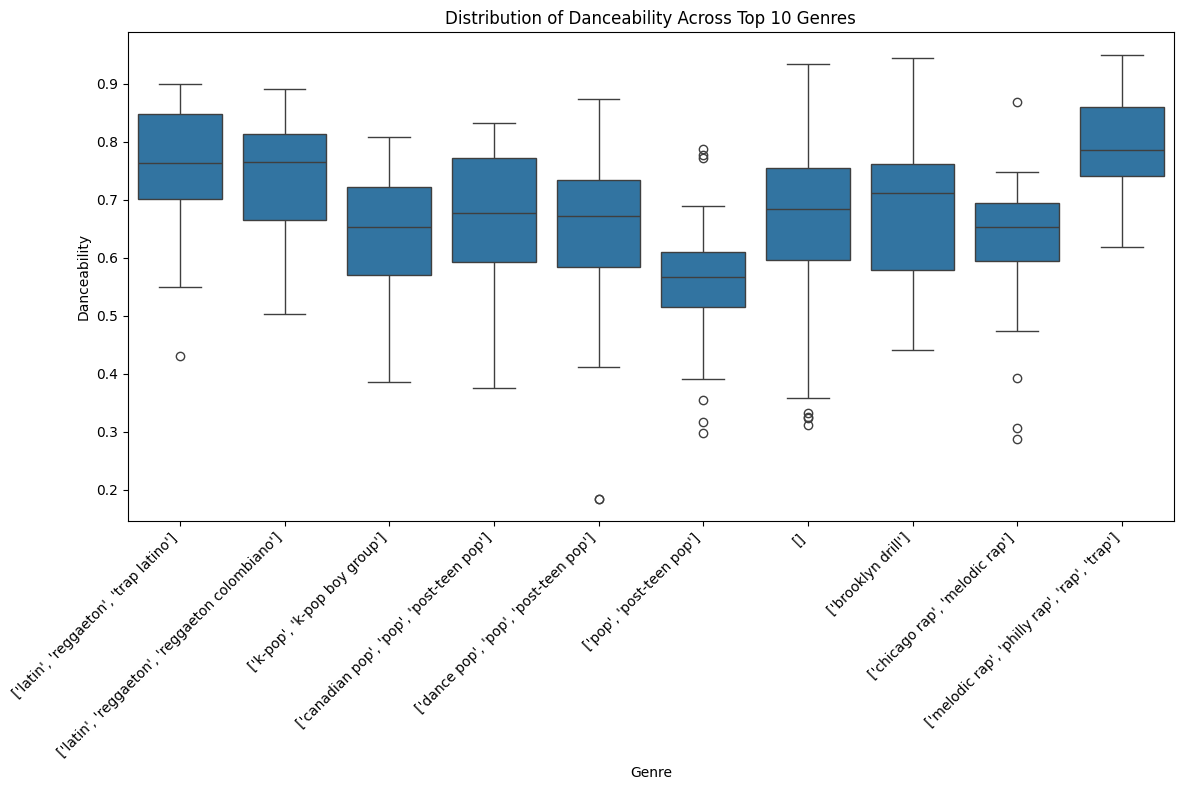

In [25]:
# 3 Boxplot showing distribution of danceability across genres.
plt.figure(figsize=(12, 8))
# Get top 10 genres for better visualization
top_10_genres = common_genres.head(10).index
df_filtered = df[df['Genre'].isin(top_10_genres)]

sns.boxplot(data=df_filtered, x='Genre', y='Danceability')
plt.title('Distribution of Danceability Across Top 10 Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


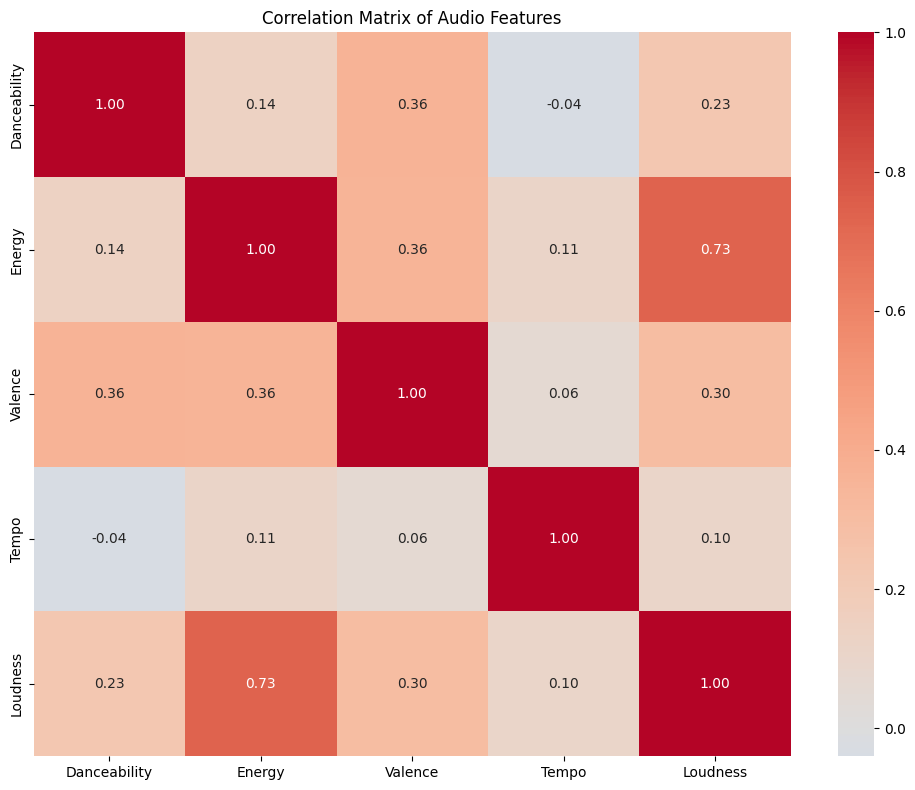

In [28]:
# 4 Heatmap showing correlation between audio features (danceability, energy, valence, tempo, loudness).

# First convert all audio features to numeric
audio_features_extended = ['Danceability', 'Energy', 'Valence', 'Tempo', 'Loudness']

for feature in audio_features_extended:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

# Select only the audio features for correlation
audio_df = df[audio_features_extended]

# Calculate correlation matrix
corr_matrix = audio_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Matrix of Audio Features')
plt.tight_layout()
plt.show()

In [30]:
# 5 Line chart showing trend of popularity over time.

plt.figure(figsize=(12, 6))
df.groupby('Release Year')['Popularity'].mean().plot(kind='line', color='blue', marker='o')
plt.title('Trend of Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.grid()
plt.tight_layout()
plt.show()

KeyError: 'Release Year'

<Figure size 1200x600 with 0 Axes>

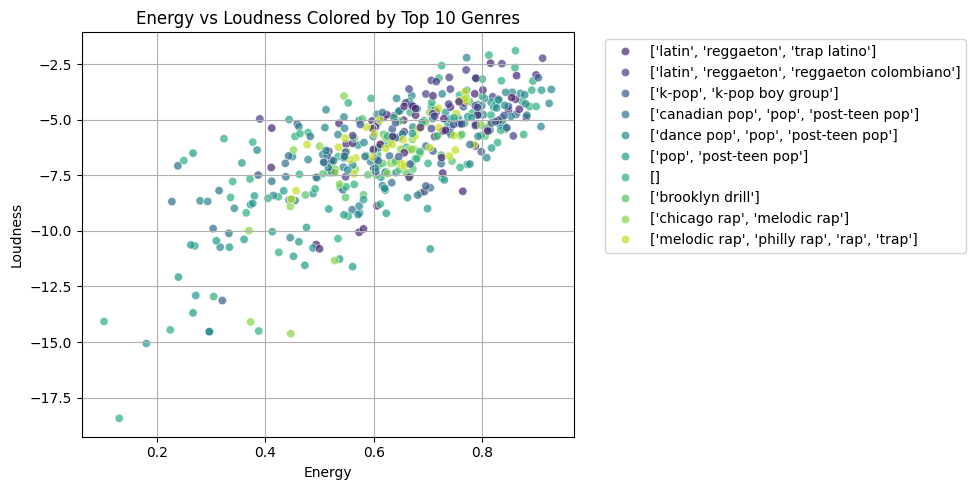

In [38]:
# 6 Scatter plot of energy vs loudness colored by genre.

# Filter for top 10 genres to reduce clutter
top_10_genres = df['Genre'].value_counts().head(10).index
df_filtered = df[df['Genre'].isin(top_10_genres)]

plt.figure(figsize=(10, 5))  # Adjust figure size to make it more compact
sns.scatterplot(data=df_filtered, x='Energy', y='Loudness', hue='Genre', palette='viridis', alpha=0.7)
plt.title('Energy vs Loudness Colored by Top 10 Genres')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.grid()
plt.tight_layout()
plt.show()